In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os import listdir

dirpath = "~/Desktop/CS498/project/stack/"
TIME = 1
ADDR = 2
RSSI = 3
CHNL = 5
'''
addrDict={
    'EF:F3:F2:34:B9:1F': 1,
    'E9:70:AB:45:DF:F4': 2,
    'C6:0D:29:0E:D8:74': 3,
    'D1:83:FE:03:9C:37': 4,
    'EA:93:A1:6D:AE:E9': 5,
    'EA:D2:1B:15:A3:D5': 6,
    'CD:2C:DF:8F:F4:81': 7,
    'FF:1B:2F:FB:89:3D': 8,
    'C6:51:BC:E4:0A:BF': 9,
    'F3:BB:A4:2B:2E:E0': 10,
    'E0:C4:A3:54:D2:9B': 11,
}
'''
addrDict={
    'EF:F3:F2:34:B9:4F': 1,
    'E9:70:AB:45:DF:44': 2,
    'C6:0D:29:0E:D8:44': 3,
    'D1:83:FE:03:9C:47': 4,
    'EA:93:A1:6D:AE:49': 5,
    'EA:D2:1B:15:A3:45': 6,
    'CD:2C:DF:8F:F4:41': 7,
    'FF:1B:2F:FB:89:4D': 8,
    'C6:51:BC:E4:0A:4F': 9,
    'F3:BB:A4:2B:2E:40': 10,
    'E0:C4:A3:54:D2:4B': 11,
}
nDev = len(addrDict)

In [2]:
fList=[]
for file in listdir("./"):
    if file.endswith(".csv"):
        fList.append(file)

In [3]:
def plot_rssi_time(filename, nPkt):
    record = pd.read_csv(dirpath + filename).values # no header
    time_rssi = {addr.strip() : record[record[:, ADDR]==addr, TIME:RSSI+1:2] for addr in set(record[:,ADDR])}
    plt.figure()
    sorted_data = sorted(time_rssi.items(), key=lambda x: addrDict[x[0]])
    for addr, data in sorted_data:
        plt.plot(data[:nPkt,0]-record[0,TIME], data[:nPkt,1], '-x', color=str((addrDict[addr]-1)*0.07), label=str(addrDict[addr]))

    plt.title(filename.split('.')[0])
    plt.xlabel('time stamp (ms)')
    plt.ylabel('RSSI (dbm)')
    plt.legend(bbox_to_anchor=(1.2, 1.02))

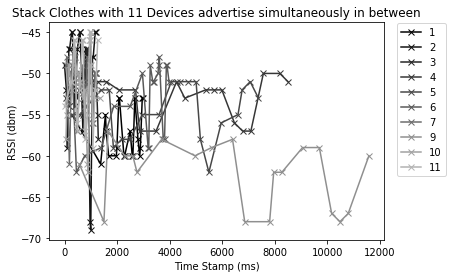

In [12]:
filename = 'stack_clothing_80cm.csv'
nPkt = 20
record = pd.read_csv(dirpath + filename).values # no header
time_rssi = {addr.strip() : record[record[:, ADDR]==addr, TIME:RSSI+1:2] for addr in set(record[:,ADDR])}
plt.figure()
sorted_data = sorted(time_rssi.items(), key=lambda x: addrDict[x[0]])
for addr, data in sorted_data:
    plt.plot(data[:nPkt,0]-record[0,TIME], data[:nPkt,1], '-x', color=str((addrDict[addr]-1)*0.07), label=str(addrDict[addr]))

plt.title("Stack Clothes with 11 Devices advertise simultaneously in between")
plt.xlabel('Time Stamp (ms)')
plt.ylabel('RSSI (dbm)')
plt.legend(bbox_to_anchor=(1.2, 1.02))

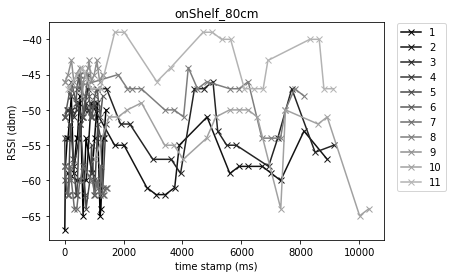

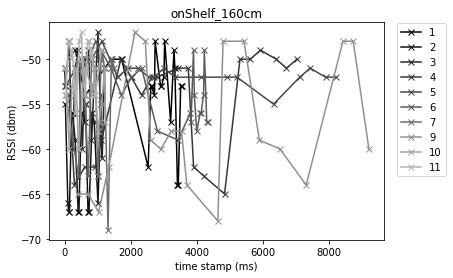

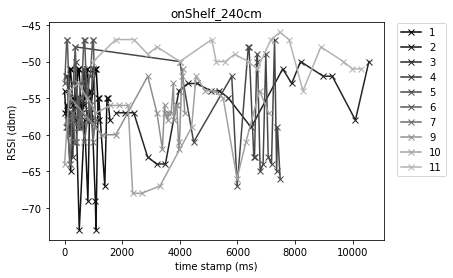

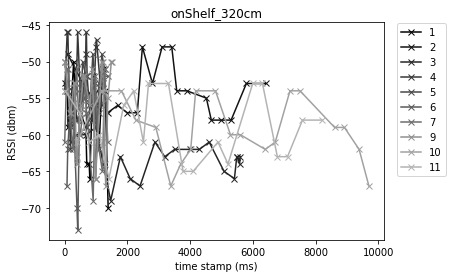

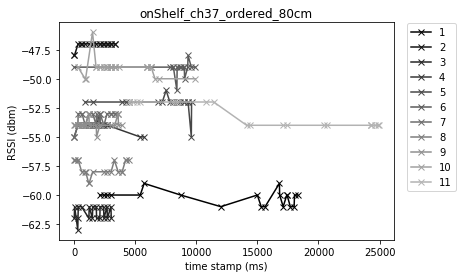

In [4]:
first_n_adv = 20
fList = [
    'onShelf_80cm.csv',
    'onShelf_160cm.csv',
    'onShelf_240cm.csv',
    'onShelf_320cm.csv',
    'onShelf_ch37_ordered_80cm.csv'
]
for f in fList:
    plot_rssi_time(f, first_n_adv)

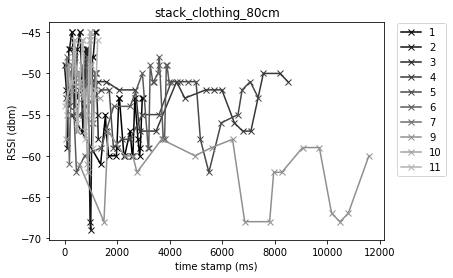

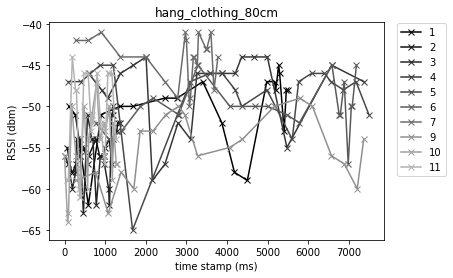

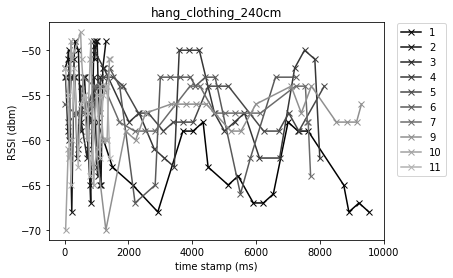

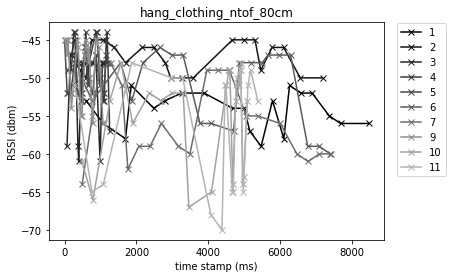

In [5]:
fList = [
    'stack_clothing_80cm.csv',
    'hang_clothing_80cm.csv',
    'hang_clothing_240cm.csv',
    'hang_clothing_ntof_80cm.csv'
]
for f in fList:
    plot_rssi_time(f, first_n_adv)